<a href="https://colab.research.google.com/github/yousenwang/information-retrieval/blob/main/information_retrieval_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information Retrieval

# Outline

- TFIDF (Term Frequency Inverse Document Frequency)
- KD Tree (K - Dimensional Tree)

# TFIDF
- Term Frequency Inverse Document Frequency

- TF * IDF

- TF 
  - 一個字的重要性取決於它在該文章出現多少次。
- IDF
  - 一個字出現在所有文章中越多次代表其文章的代表性是低的，所以要取倒數。
  - 一個字越有文章代表性，其全部Document Frequency就會對低。

# KDTree

- K - Dimensional Tree

In [52]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KDTree

In [10]:
faq = pd.read_csv('english_FAQ.csv')

In [11]:
faq.head()

,question,reply,Similar question
0,How to jump to the specified work station?,"You need to log in the administrator account, ...",How to return to the previous station? / How c...
1,How to deal with the discrepancy between the r...,Background of Service Center -> Receiving and ...,How to deal with the discrepancy? / What if th...
2,How to modify the content of the label printed...,The service center can contact the manufacture...,Can the content of the label printed by the wo...
3,How to upgrade Product SN after replacing spar...,Click `Parts Replacement` to enter the spare p...,How to upgrade the SN after replacing the PCBA...
4,How to work with multiple product failures?,"During the operation of service center, the [W...",Meet a variety of bad how to deal with? How to...


# 訓練: 目前數據只輸入回覆內容；無問題


In [79]:
tfidf = TfidfVectorizer().fit(faq['reply'])
train_tfidf = tfidf.transform(faq.reply)
train = train_tfidf.toarray()
faq["tfidf"] = list(train)

In [29]:
faq.head()

,question,reply,Similar question,tfidf
0,How to jump to the specified work station?,"You need to log in the administrator account, ...",How to return to the previous station? / How c...,"[0.0, 0.13059249446406113, 0.0, 0.153621717161..."
1,How to deal with the discrepancy between the r...,Background of Service Center -> Receiving and ...,How to deal with the discrepancy? / What if th...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.13140786205855845,..."
2,How to modify the content of the label printed...,The service center can contact the manufacture...,Can the content of the label printed by the wo...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,How to upgrade Product SN after replacing spar...,Click `Parts Replacement` to enter the spare p...,How to upgrade the SN after replacing the PCBA...,"[0.0, 0.0, 0.0, 0.0, 0.10546317532403915, 0.0,..."
4,How to work with multiple product failures?,"During the operation of service center, the [W...",Meet a variety of bad how to deal with? How to...,"[0.3052216076243383, 0.0, 0.15261080381216915,..."


In [30]:
faq['tfidf'][0].shape

(171,)

In [66]:
kdtree = KDTree(train)

In [38]:
print(faq.question[2])
distance, idx = kdtree.query(faq.tfidf[2].reshape(1,-1), k=3)

for i, value in list(enumerate(idx[0])):
  print(f'question : {faq["question"][value]}')
  print(f'Distance : {distance[0][i]}')
  print(f'reply : {faq["reply"][value]}')

How to modify the content of the label printed in the station?
question : How to modify the content of the label printed in the station?
Distance : 0.0
reply : The service center can contact the manufacturer to modify the label printing at the factory station. The maintenance service background of the factory -> Engineering Support -> the printing at the factory station. The label content can be modified by selecting the corresponding printing template.
question : Where can I see the use record of spare parts?
Distance : 1.1204617066588503
reply : For example, in the process of operation in the station, you can check the replacement of spare parts of the product in the field of `Replacement Maintenance Record` of the repaired product information; In the background of the service center -> Engineering Support -> Spare Parts Management, select the corresponding manufacturer and click `Spare Parts Usage Record` to view the use of spare parts of the manufacturer in the service center.
ques

In [39]:
import joblib

In [47]:
joblib.dump(tfidf, 'trained_tfidf_vectorizer.pkl')
joblib.dump(kdtree, 'trained_kd_tree.pkl')

['trained_kd_tree.pkl']

# 預測: 輸入問題

In [48]:
str_to_numerical = joblib.load('trained_tfidf_vectorizer.pkl')
info_retrieve = joblib.load('trained_kd_tree.pkl')

In [53]:
question = [faq.question[2]]

In [54]:
numerical = str_to_numerical.transform(question).toarray()

distance, idx = info_retrieve.query(numerical, k=3)
print(question)
print(numerical.shape)

for i, value in list(enumerate(idx[0])):
  print(f'question : {faq["question"][value]}')
  print(f'Distance : {distance[0][i]}')
  print(f'reply : {faq["reply"][value]}')

['How to modify the content of the label printed in the station?']
(1, 171)
question : How to modify the content of the label printed in the station?
Distance : 0.938872278120583
reply : The service center can contact the manufacturer to modify the label printing at the factory station. The maintenance service background of the factory -> Engineering Support -> the printing at the factory station. The label content can be modified by selecting the corresponding printing template.
question : Where can I see the use record of spare parts?
Distance : 1.0655491778976458
reply : For example, in the process of operation in the station, you can check the replacement of spare parts of the product in the field of `Replacement Maintenance Record` of the repaired product information; In the background of the service center -> Engineering Support -> Spare Parts Management, select the corresponding manufacturer and click `Spare Parts Usage Record` to view the use of spare parts of the manufacturer 

In [69]:
ans = 0
for k, _ in faq.question.items():

  question = [faq.question[k]]
  reply = [faq.reply[k]]
  numerical = str_to_numerical.transform(question).toarray()

  distance, idx = info_retrieve.query(numerical, k=1)
  print(question)
  print(reply)
  print(numerical.shape)

  for i, value in list(enumerate(idx[0])):
    print(f'Predicted_Q : {faq["question"][value]}')
    print(f'Distance : {distance[0][i]}')
    print(f'Predicted_Reply : {faq["reply"][value]}')
    print(question[0]==faq["question"][value])
    ans+= 1 if question[0]==faq["question"][value] else 0
  print("\n")

['How to jump to the specified work station?']
['You need to log in the administrator account, enter the service center background -> Schedule Control -> Schedule Maintenance, enter the `Warranty Item` page, select the corresponding product serial number, pull down the `Maintenance operation`, click `Schedule Maintenance`, and select `Skip to designated site` to skip.']
(1, 171)
Predicted_Q : How to set the products and stations that operators can work on?
Distance : 1.1383577351791334
Predicted_Reply : Service center background -> Service Settings -> Station Settings, select the operator, click [product Settings] to check the product, you can set the operator can work on the product; Click `Station Settings` to check `station Settings` to set the station that the operator can operate.
False


['How to deal with the discrepancy between the received repair products and the warranty application?']
['Background of Service Center -> Receiving and Sending of goods -> Receiving and sending m

# Evaluation: Accuary

In [83]:
n = len(faq)
print(ans)
print(len(faq))
print(ans/len(faq))

7
10
0.7


# Reference

- [Information Retrieval | NLTK | Day 06 | NLP Tutorial | Python](https://www.youtube.com/watch?v=4DJVB3FrcvY&list=PLl1gyDCKkiQTCdmjNcBQuPCOJxwAgBJu8&index=1&ab_channel=Learnbay)

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer

- KNN
[https://scikit-learn.org/stable/modules/neighbors.html](https://scikit-learn.org/stable/modules/neighbors.html)
- KD-Tree
https://www.youtube.com/watch?v=1OoM0phlO_U&t=1s&ab_channel=OsirisSalazar


In [74]:
tfidf.get_feature_names_out().shape

(171,)

In [75]:
tfidf.get_feature_names_out()

array(['according', 'account', 'actual', 'administrator', 'after',
       'again', 'and', 'application', 'are', 'assign', 'at',
       'automatically', 'background', 'basic', 'be', 'bring', 'but',
       'button', 'by', 'can', 'case', 'center', 'check', 'checked',
       'click', 'code', 'codes', 'complete', 'confirmation', 'contact',
       'content', 'control', 'corresponding', 'current', 'custom',
       'customer', 'data', 'date', 'day', 'days', 'delete', 'designated',
       'different', 'down', 'during', 'each', 'end', 'engineering',
       'enter', 'equal', 'every', 'example', 'factory', 'fault', 'field',
       'for', 'generate', 'goods', 'greater', 'guidance', 'if', 'in',
       'information', 'input', 'is', 'item', 'its', 'jump', 'label',
       'less', 'list', 'log', 'maintenance', 'management', 'manufacturer',
       'marked', 'material', 'modified', 'modify', 'need', 'not',
       'number', 'of', 'office', 'on', 'one', 'only', 'operate',
       'operation', 'operations', '

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import math

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


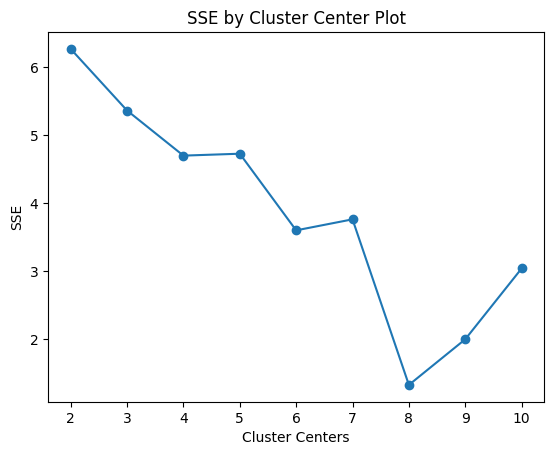

In [136]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        # sse.append(KMeans(n_clusters=k).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(train_tfidf, n)

In [137]:
clusters = MiniBatchKMeans(n_clusters=8, init_size=1024, batch_size=2048, random_state=20).fit_predict(train_tfidf)

In [138]:
clusters

array([0, 1, 6, 7, 4, 0, 5, 2, 1, 3], dtype=int32)

In [139]:
train_tfidf.shape

(10, 171)

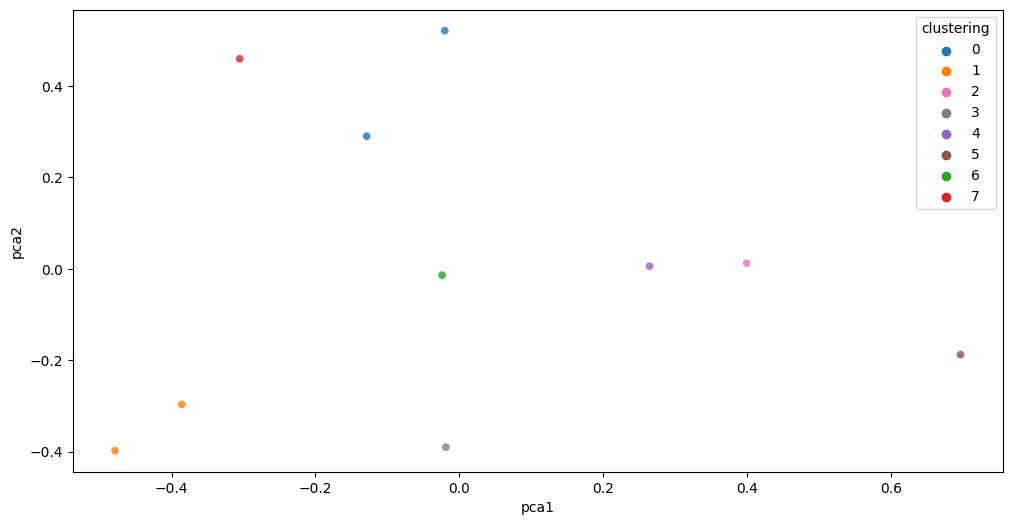

In [148]:
import seaborn as sns
def plot_tsne_pca(data, labels):

    input = np.asarray(data.todense())

    pca = pd.DataFrame(PCA(n_components=2).fit_transform(input), columns=["pca1", "pca2"])
    pca["clustering"] = labels
    unique = pca["clustering"].unique()
    palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    sns.scatterplot(data=pca,x='pca1',y='pca2', hue='clustering',legend="full",alpha=0.8,ax=ax, palette=palette)
    
plot_tsne_pca(train_tfidf, clusters)

In [149]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(train_tfidf, clusters, tfidf.get_feature_names_out(), 10)


Cluster 0
to,enter,skip,spare,parts,of,maintenance,in,schedule,the

Cluster 1
customer,be,of,waybill,to,and,sending,receiving,the,goods

Cluster 2
click,to,can,check,set,product,the,operator,station,settings

Cluster 3
or,marked,custom,to,the,is,greater,day,than,tat

Cluster 4
situation,code,during,can,different,operation,fault,guidance,according,the

Cluster 5
registering,own,only,their,can,different,operator,roles,data,rights

Cluster 6
content,by,contact,can,at,station,label,printing,factory,the

Cluster 7
pcba,to,parts,replacement,number,enter,page,and,the,upgrade


In [152]:
faq['clustering'] = clusters
faq.head()

,question,reply,Similar question,tfidf,clustering
0,How to jump to the specified work station?,"You need to log in the administrator account, ...",How to return to the previous station? / How c...,"[0.0, 0.13059249446406113, 0.0, 0.153621717161...",0
1,How to deal with the discrepancy between the r...,Background of Service Center -> Receiving and ...,How to deal with the discrepancy? / What if th...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.13140786205855845,...",1
2,How to modify the content of the label printed...,The service center can contact the manufacture...,Can the content of the label printed by the wo...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6
3,How to upgrade Product SN after replacing spar...,Click `Parts Replacement` to enter the spare p...,How to upgrade the SN after replacing the PCBA...,"[0.0, 0.0, 0.0, 0.0, 0.10546317532403915, 0.0,...",7
4,How to work with multiple product failures?,"During the operation of service center, the [W...",Meet a variety of bad how to deal with? How to...,"[0.3052216076243383, 0.0, 0.15261080381216915,...",4


In [153]:
faq[faq['clustering'] == 1]

,question,reply,Similar question,tfidf,clustering
1,How to deal with the discrepancy between the r...,Background of Service Center -> Receiving and ...,How to deal with the discrepancy? / What if th...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.13140786205855845,...",1
8,Where is the logistics waybill label printed?,"At the end of the case, if `Generate Waybill l...",Can I print the waybill label after the case i...,"[0.0, 0.0, 0.0, 0.0, 0.11381720381762651, 0.0,...",1


# Reference

- [Seaborn - change color according to hue name](https://stackoverflow.com/questions/46173419/seaborn-change-color-according-to-hue-name)

- https://www.kaggle.com/code/aussie84/clustering-with-kmeans-pca-tsne

- https://www.kaggle.com/code/jbencina/clustering-documents-with-tfidf-and-kmeans